In [154]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv("Mall_Customers.csv")

In [156]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [157]:
#datatypes of each column
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [158]:
#the describe() method which returns a table containing details about the dataset. 
#The count property directly gives the count of non-NaN values in each column. 
df.describe() #applicable only for numeric datatype column

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


[Text(0.5, 0, 'Range of Annual Income (k$)'), Text(0, 0.5, 'Count')]

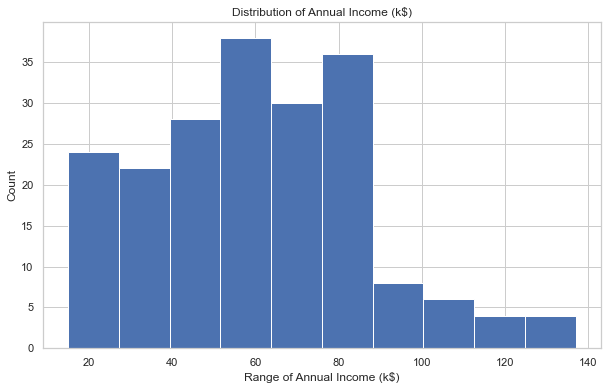

In [159]:
#Distribution of Annnual Income-Most of the annual income falls between 50K to 85K.
plt.figure(figsize=(10,6))
plot1=df["Annual Income (k$)"].plot(kind='hist',title='Distribution of Annual Income (k$)')
plot1.set(xlabel="Range of Annual Income (k$)", ylabel="Count")

[Text(0.5, 0, 'Range of Age'), Text(0, 0.5, 'Count')]

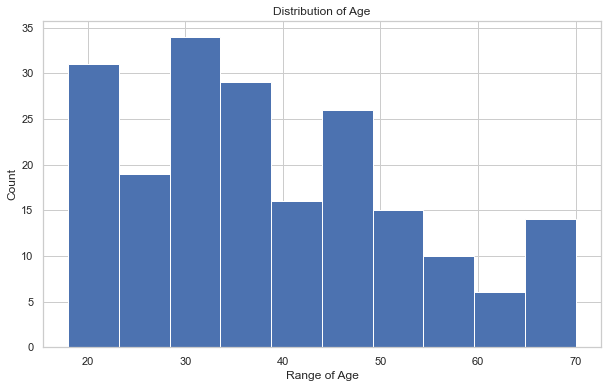

In [160]:
#Distribution of age-
plt.figure(figsize=(10,6))
plot2=df["Age"].plot(kind='hist',title='Distribution of Age')
plot2.set(xlabel="Range of Age", ylabel="Count")

[Text(0.5, 0, 'Range of Spending Score (1-100)'), Text(0, 0.5, 'Count')]

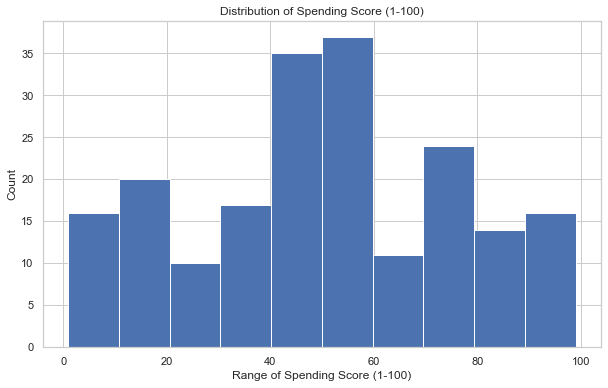

In [161]:
#Distribution of spending score-The maximum spending score is in the range of 40 to 60.
plt.figure(figsize=(10,6))
plot3=df["Spending Score (1-100)"].plot(kind='hist',title='Distribution of Spending Score (1-100)')
plot3.set(xlabel="Range of Spending Score (1-100)", ylabel="Count")

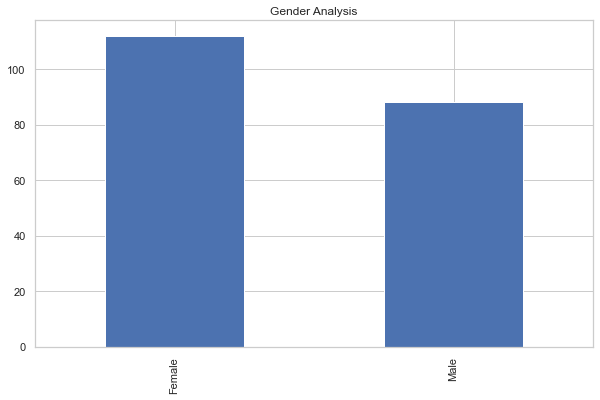

In [162]:
#gender analysis-more female customers
plt.figure(figsize=(10,6))
plot4=df["Gender"].value_counts().plot.bar(title='Gender Analysis')

In [163]:
#K-Means Clustering algorithm to cluster the data.

In [164]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [165]:
#Clustering based on 2 features -annual income and spending score.
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

<Figure size 720x432 with 0 Axes>

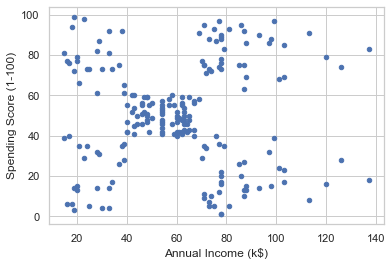

In [166]:
#Scatter plot of spending score vs annual income
plt.figure(figsize=(10,6))
df1.plot.scatter(x="Annual Income (k$)",y="Spending Score (1-100)")

In [167]:
#The Elbow method is a method of interpretation and validation of consistency 
#within-cluster analysis designed to help to find the appropriate number of clusters in a dataset.
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1) #Fit the model to the data samples using .fit()
    wcss.append(km.inertia_)
#Inertia measures how well a dataset was clustered by K-Means. 
#It is calculated by measuring the distance between each data point and its centroid, 
#squaring this distance, and summing these squares across one cluster.

C:\Users\Admin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


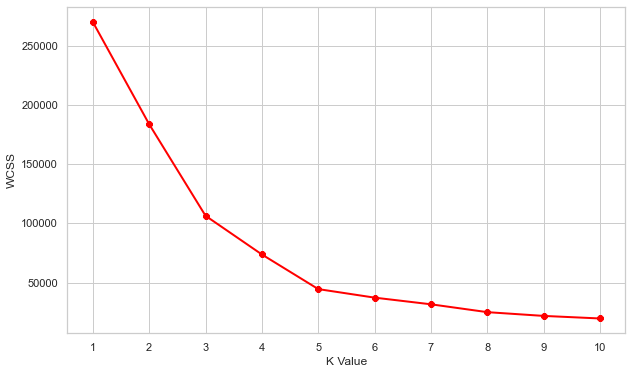

In [168]:
#The elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [169]:
#It is clear from the figure that we should take the number of clusters equal to 5, 
#as the slope of the curve is not steep enough after it.
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fit the model to the data samples using .fit(). 
#Predict the cluster that each data sample belongs to using .predict() and store these as labels.
#Fitting the input data
km1.fit(df1)
#predicting the labels of the input data
y=km1.predict(df1)

In [170]:
#new df with clustering
dff=pd.read_csv("Mall_Customers.csv")
#adding the labels to a column named label
dff["label"] = y
#The new dataframe with the clustering done
dff

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [171]:
dff["label"].unique()

array([1, 3, 4, 0, 2])

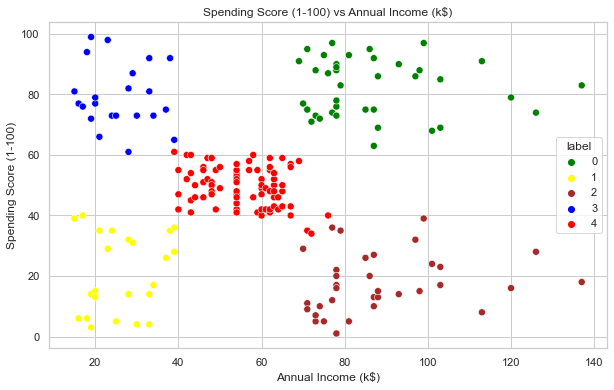

In [175]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                palette=['green','yellow','brown','blue','red'], legend='full',data = dff,s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
"""Analyzing the Results
We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall.

In cluster 1(yellow colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

In cluster 3(blue colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

In cluster 4(red colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 0(green colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

In cluster 2(brown colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 3 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 2 happy and satisfied."""